Load the image

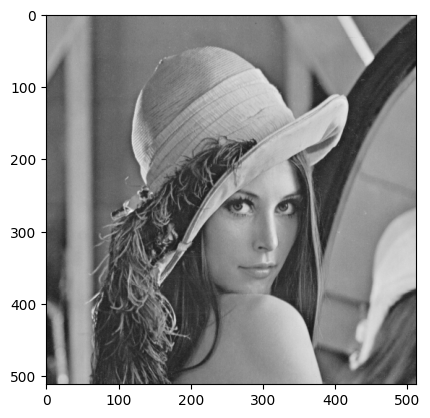

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/Data_At2/Lena.png"
image = cv2.imread(image_path)
plt.imshow(image)

Add a gaussian noise

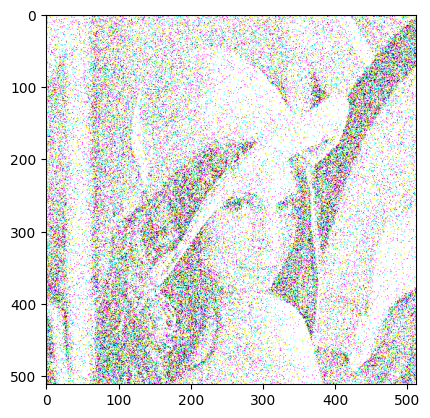

In [31]:
row,col,ch= image.shape
mean = 0
sigma = 100
gauss = np.random.normal(mean,sigma,(row,col,ch))
gauss = gauss.reshape(row,col,ch)
noisy = image + gauss
cv2.imwrite('noisy.png', noisy)
plt.imshow(noisy)

Gaussien and mean filter

On va essayer de débruiter l'image avec plusieurs taille de kernel

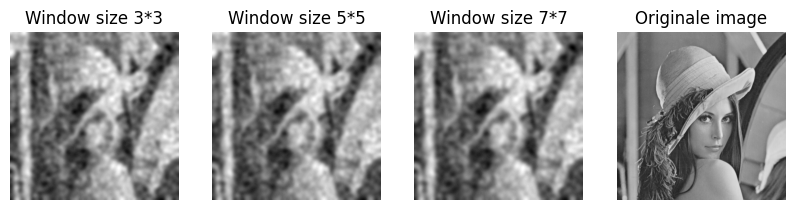

In [35]:
#Aplly mean filter
from skimage import data, util, img_as_float
from skimage.color import rgb2gray
noisy1= img_as_float(rgb2gray(noisy))
noisy_image_uint8 =noisy1.astype(np.uint8)
#mean_filter = cv2.blur(noisy_image_uint8, (5,5))
#plt.imshow(mean_filter,cmap='gray')
plt.figure(figsize=(10, 5))
j=1
for i in range(3,8,2):
  mean_filter = cv2.blur(mean_filter, (i,i))
  plt.subplot(1, 4,j)
  plt.imshow(mean_filter, cmap='gray')
  plt.title("Window size {}*{}".format(i,i))
  plt.axis('off')
  j+=1
plt.subplot(1, 4, 4)
plt.imshow(image, cmap='gray')
plt.title("Originale image")
plt.axis('off')
plt.show()


###on remarque qu'aucun filtre ne donne une bonne résultat: image et floue et le bruit réside encore avec un effet import sur la netté de l'image

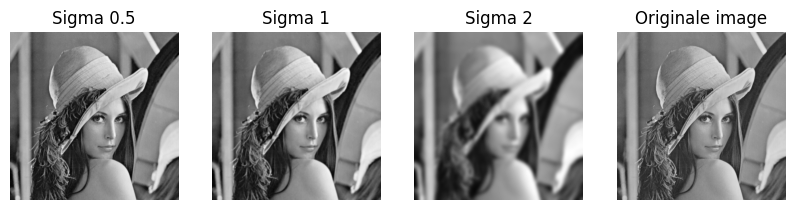

In [51]:
from skimage import data, filters, color
treated_image = filters.gaussian(image, sigma=0.5)
treated_image1 = filters.gaussian(image, sigma=1)
treated_image2 = filters.gaussian(image, sigma=5)
treated_image=rgb2gray(treated_image)
treated_image1=rgb2gray(treated_image1)
treated_image2=rgb2gray(treated_image2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.imshow(treated_image, cmap='gray')
plt.title("Sigma 0.5")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(treated_image1, cmap='gray')
plt.title("Sigma 1")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(treated_image2, cmap='gray')
plt.title("Sigma 2")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(image, cmap='gray')
plt.title("Originale image")
plt.axis('off')
plt.show()

In [37]:
import numpy as np
from skimage.color import rgb2gray
from math import exp

def NlMeans(image: np.array, r: int, t: int) -> np.array:
    grayscale_image = rgb2gray(image)
    l,h = grayscale_image.shape
    ims = np.zeros((l, h))
    for i in range(l):
        for j in range(h):
            if (i - t >= 0 and i + t < l) and (j - t >= 0 and j + t < h):
                P = grayscale_image[i - r:i + r + 1, j - r:j + r + 1]
                w = np.zeros((2 * t + 1, 2 * t + 1))
                for a in range(-t, t + 1):
                    for b in range(-t, t + 1):
                        if (i + a - r >= 0 and i + a + r < l) and (j + b - r >= 0 and j + b + r < h):
                            Q = grayscale_image[i + a - r:i + a + r + 1, j + b - r:j + b + r + 1]
                            d = np.sum((P - Q) ** 2)
                            w[a+t,b+t]=exp(-d/(2*25))
                w1 = np.sum(w)
                if w1 > 0:
                    ims[i, j] = np.sum(w * grayscale_image[i - t:i + t + 1, j - t:j + t + 1]) / w1
    return ims

In [38]:
ims3_3=NlMeans(image,3,3)
ims5_5=NlMeans(image,5,5)
ims7_7=NlMeans(image,7,7)


#Comparaison Visuelle entre le filtrre gaussien et NLM

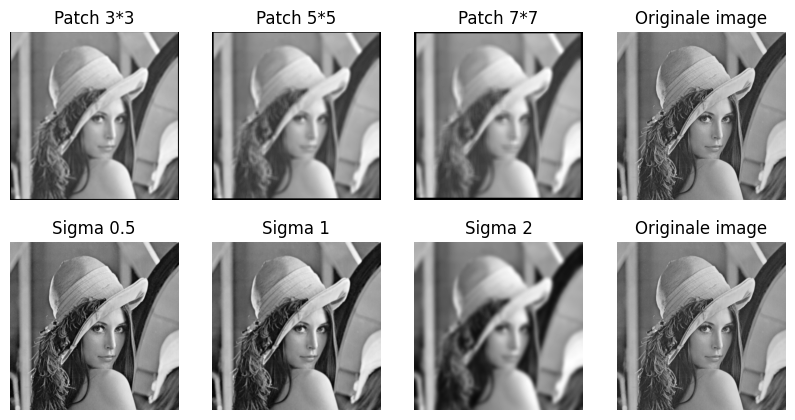

In [52]:
# Afficher lle simages débruitées avec le filtre gaussien et le filte NLM
plt.figure(figsize=(10, 5))

plt.subplot(2, 4, 1)
plt.imshow(ims3_3, cmap='gray')
plt.title("Patch 3*3")
plt.axis('off')
plt.imshow(ims3_3,cmap='gray')

plt.subplot(2, 4, 2)  # 1 row, 3 columns, position 1
plt.imshow(ims5_5, cmap='gray')
plt.title("Patch 5*5")
plt.axis('off')
plt.imshow(ims5_5,cmap='gray')

plt.subplot(2, 4, 3)  # 1 row, 3 columns, position 1
plt.imshow(ims7_7, cmap='gray')
plt.title("Patch 7*7")
plt.axis('off')
plt.subplot(2, 4, 4)
plt.imshow(image, cmap='gray')
plt.title("Originale image")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(treated_image, cmap='gray')
plt.title("Sigma 0.5")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(treated_image1, cmap='gray')
plt.title("Sigma 1")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(treated_image2, cmap='gray')
plt.title("Sigma 2")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(image, cmap='gray')
plt.title("Originale image")
plt.axis('off')

plt.show()




#### Dans cette parti, on a testé l'influence de de la taille du patch sur la qualité de l'image. Pour un sigma=10, la taille du patch 3*3 donne une emeilleur résultat.

Le filtre NLM donne une bonne résultat visuelle mais un peur floue. Mais visuellement , le filtre gaussien donne une résultat plus meilleur mais if faut bien estimer la valeur de sigma

#Compararaison Quantitative

SSIM (Structural Similarity Index)

In [53]:
from skimage.metrics import structural_similarity as ssim
image_float=(rgb2gray(image)).astype(np.float32)
print(np.shape(image_float))
print(np.shape(ims3_3))
ssim_NLM, _ = ssim(image_float,ims3_3, data_range=1.0, full=True)
print(treated_image.shape)
ssim_gaussian, _ = ssim(image_float,treated_image, data_range=1.0, full=True)
print("SSIM NLM: ",ssim_NLM)
print("SSIM gaussian: ",ssim_gaussian)

(512, 512)
(512, 512)
(512, 512)
SSIM NLM:  0.7721594797606655
SSIM gaussian:  0.9880809372679421


SSIM (Structural Similarity Index) : Plus proche de 1, plus l'image filtrée est similaire à l'originale. On conclue que le filtre gaussien donne un eimage plus similaire a l'originale.

SNR

In [57]:
from skimage.metrics import peak_signal_noise_ratio as psnr
psnr_NLM=psnr(image_float,ims3_3)
psnr_gaussian=psnr(image_float,treated_image)
print("PSNR NLM: ",psnr_NLM)
print("PSNR gaussian: ",psnr_gaussian)

PSNR NLM:  21.217322962789158
PSNR gaussian:  42.27831432551654


<ipython-input-57-aff768ede1aa>:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_NLM=psnr(image_float,ims3_3)
<ipython-input-57-aff768ede1aa>:3: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_gaussian=psnr(image_float,treated_image)


De meme, Le filtre gaussien donne une résultat plus meilleur que le filtre NLM